In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import warnings

plt.style.use('seaborn')
plt.rcParams['figure.figsize']=[16,9]
plt.rcParams['figure.dpi']= 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE  = '2016-01-01'
END_DATE = '2020-05-31'


In [31]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                start=START_DATE,
                end=END_DATE,
                adjusted=True,
                progress=False)
df

Adj Close                     Close                      High  \
                   AMZN        ^GSPC         AMZN        ^GSPC         AMZN   
Date                                                                          
2016-01-04   636.989990  2012.660034   636.989990  2012.660034   657.719971   
2016-01-05   633.789978  2016.709961   633.789978  2016.709961   646.909973   
2016-01-06   632.650024  1990.260010   632.650024  1990.260010   639.789978   
2016-01-07   607.940002  1943.089966   607.940002  1943.089966   630.000000   
2016-01-08   607.049988  1922.030029   607.049988  1922.030029   624.140015   
...                 ...          ...          ...          ...          ...   
2020-05-22  2436.879883  2955.449951  2436.879883  2955.449951  2469.850098   
2020-05-26  2421.860107  2991.770020  2421.860107  2991.770020  2462.000000   
2020-05-27  2410.389893  3036.129883  2410.389893  3036.129883  2413.580078   
2020-05-28  2401.100098  3029.729980  2401.100098  3029.729980  2436.969971   
2020-05-29  2442.370117  3044.310059  2442.370117  3044.310059  2442.370117   

                                 Low                      Open               \
                  ^GSPC         AMZN        ^GSPC         AMZN        ^GSPC   
Date                                                                          
2016-01-04  2038.199951   627.510010  1989.680054   656.289978  2038.199951   
2016-01-05  2021.939941   627.650024  2004.170044   646.859985  2013.780029   
2016-01-06  2011.709961   620.309998  1979.050049   622.000000  2011.709961   
2016-01-07  1985.319946   605.210022  1938.829956   621.799988  1985.319946   
2016-01-08  1960.400024   606.000000  1918.459961   619.659973  1945.969971   
...                 ...          ...          ...          ...          ...   
2020-05-22  2956.760010  2430.129883  2933.590088  2455.010010  2948.050049   
2020-05-26  3021.719971  2414.060059  2988.169922  2458.000000  3004.080078   
2020-05-27  3036.250000  2330.000000  2969.750000  2404.989990  3015.649902   
2020-05-28  3068.669922  2378.229980  3023.399902  2384.330078  3046.610107   
2020-05-29  3049.169922  2398.199951  2998.610107  2415.939941  3025.169922   

             Volume              
               AMZN       ^GSPC  
Date                             
2016-01-04  9314500  4304880000  
2016-01-05  5822600  3706620000  
2016-01-06  5329200  4336660000  
2016-01-07  7074900  5076590000  
2016-01-08  5512900  4664940000  
...             ...         ...  
2020-05-22  2867100  3952800000  
2020-05-26  3568200  5837060000  
2020-05-27  5056900  6371230000  
2020-05-28  3190200  5402670000  
2020-05-29  3529300  7275080000  

[1109 rows x 12 columns]

In [32]:
X = df['Adj Close'].rename(columns={'RISKY_ASSET':'asset',
                                   'MARKET_BENCHMARK':'market'}).resample('M').last().pct_change().dropna()
X

,AMZN,^GSPC
Date,,
2016-02-29,-0.058739,-0.004128
2016-03-31,0.074423,0.065991
2016-04-30,0.111094,0.002699
2016-05-31,0.095817,0.015325
2016-06-30,-0.009920,0.000911
2016-07-31,0.060353,0.035610
2016-08-31,0.013640,-0.001219
2016-09-30,0.088603,-0.001234
2016-10-31,-0.056717,-0.019426


In [33]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X['^GSPC'].var()
beta = covariance / benchmark_variance
beta

1.1876370522696875

In [34]:
y = X.pop('AMZN')
X = sm.add_constant(X)

camp_model = sm.OLS(y,X).fit()
print(camp_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     31.38
Date:                Sat, 06 Jun 2020   Prob (F-statistic):           9.03e-07
Time:                        12:14:10   Log-Likelihood:                 70.268
No. Observations:                  52   AIC:                            -136.5
Df Residuals:                      50   BIC:                            -132.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0195      0.009      2.146      0.0

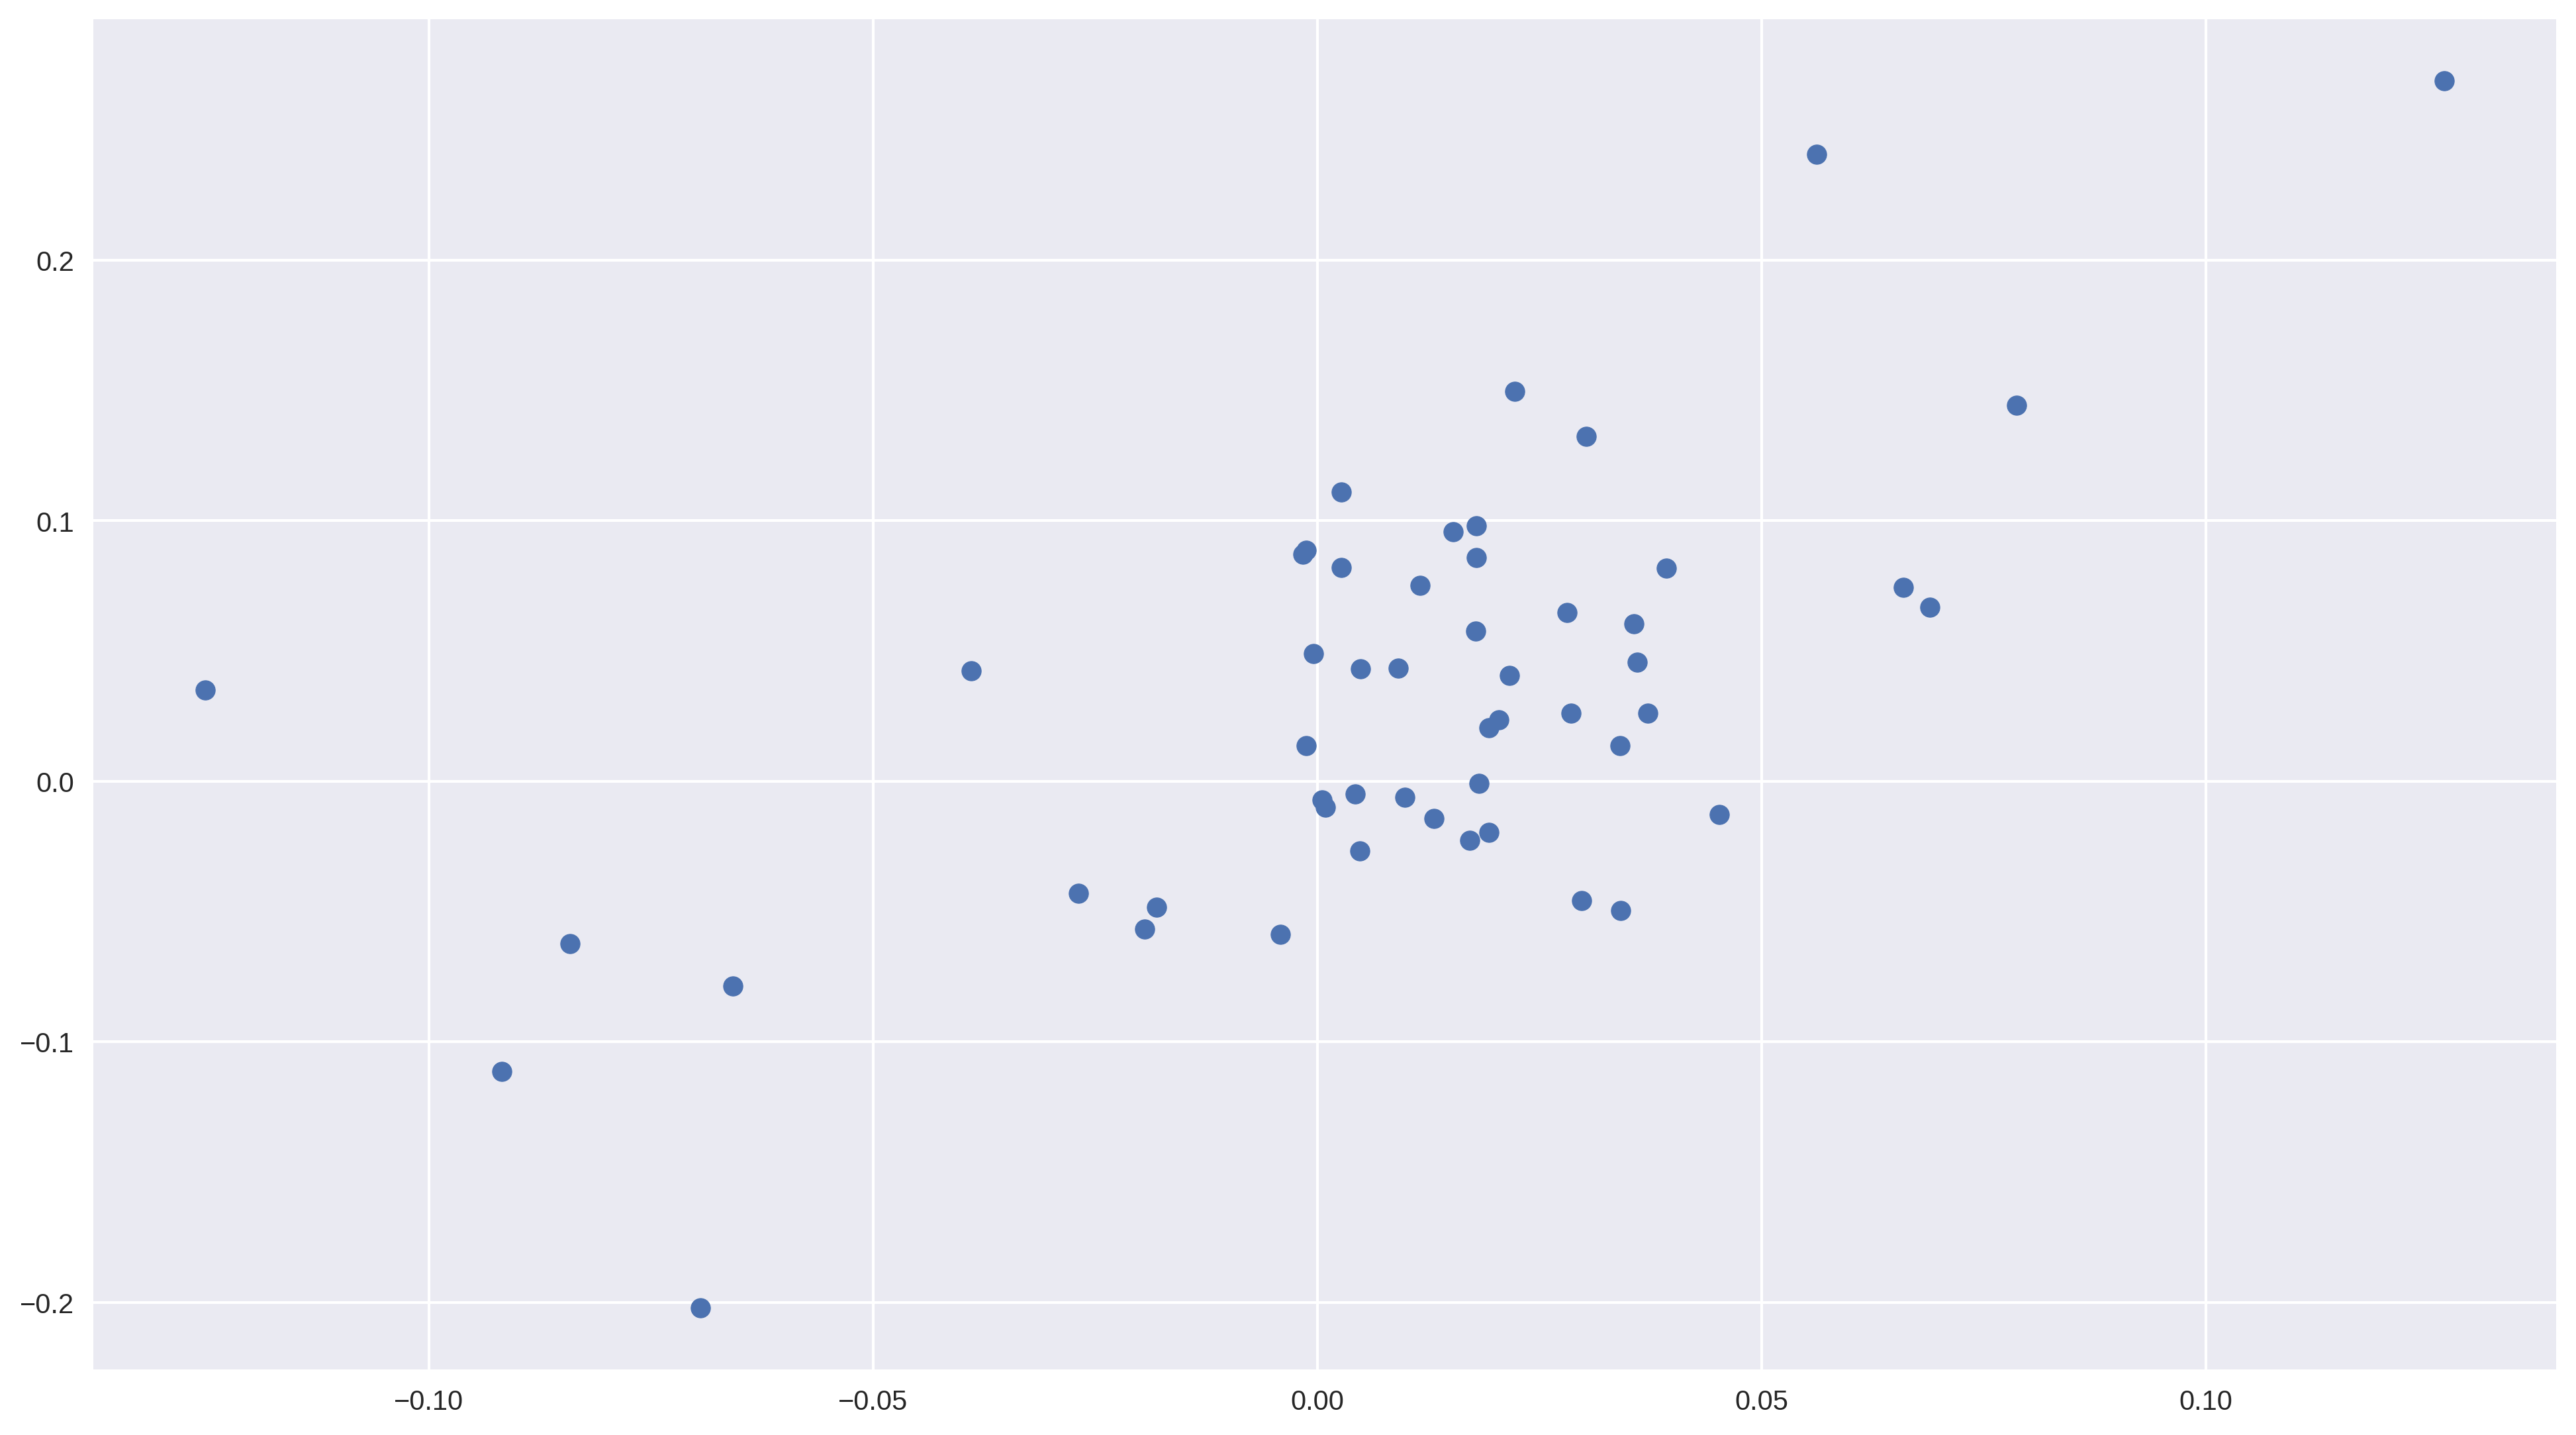

In [35]:
plt.scatter(X['^GSPC'],y)
plt.show()

In [36]:
max(y)

0.2689001688318371